In [30]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("imori.jpg")
img_noise = cv2.imread("imori_noise.jpg")
img = img[:,:,[2,1,0]]
img_noise = img_noise[:,:,[2,1,0]]

## 通道交换
将红色通道和蓝色通道交换，交换通道维的第一列和第三列即可

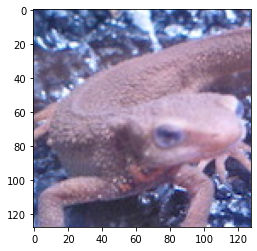

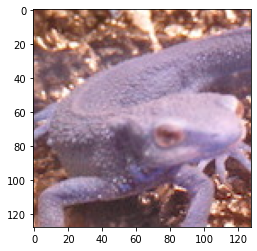

In [5]:
imshow = plt.imshow(img)
plt.show()

img1 = img.copy()
img1 = img[:,:,[2,1,0]]
imshow = plt.imshow(img1)

## 灰度化(Grayscale)
通过公式
$$
Y = 0.2126\  R + 0.7152\  G + 0.0722\  B
$$
计算得出单通道Y

matplotlib中的cmap = gray

In [7]:
#灰度化
def gray(img):
    newimg = img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0722
    return newimg

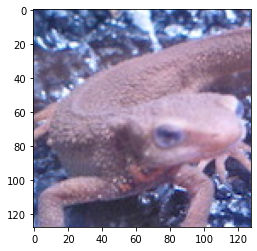

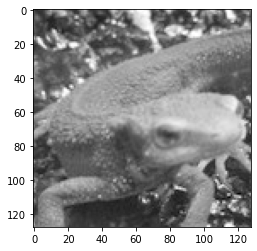

In [8]:
imshow = plt.imshow(img)
plt.show()

img2 = gray(img)
imshow = plt.imshow(img2,cmap='gray')

## 二值化(Thresholding)
计算出灰度化的值之后，对像素点进行判断，
$$
y=
\begin{cases}
0& (\text{if}\quad y < 128) \\
255& (\text{else})
\end{cases}
$$

In [14]:
#二值化
def thre(img,t=128):
    img[img<t] = 0
    img[img>=t] = 255
    return img

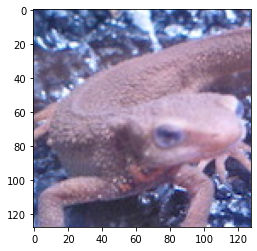

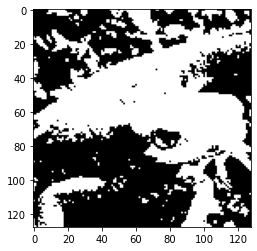

In [10]:
imshow = plt.imshow(img)
plt.show()
    
img3 = gray(img)
img3 =thre(img3)
imshow = plt.imshow(img3,cmap='gray')

## 大津二值化算法(Otus's Method)
求出一个阈值，使得类间方差最大化

In [11]:
#计算最大类间方差
def oturs(img):
    t = 0
    sd = 0
    for i in range(255):
        newsd = sfunc(img,i)
        if newsd > sd:
            sd = newsd
            t = i
    return t

In [12]:
#计算类间方差
def sfunc(img,t):
    w = img > t
    w1 = w.sum()/w.size
    w0 = 1-w1
    if w1==0 or w0==0:
        return 0
    m1 = np.mean(img[w])
    m0 = np.mean(img[~w])
    return w0*w1*(m0-m1)*(m0-m1)

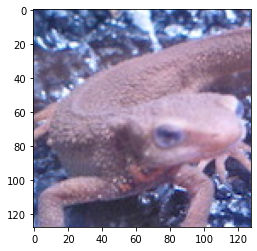

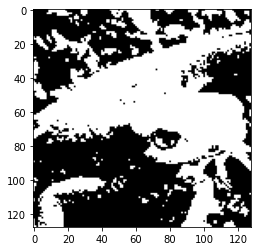

In [15]:
imshow = plt.imshow(img)
plt.show()

img4 = img.copy()
img4 = gray(img4)
t = oturs(img4)
img4 = thre(img4,t)
imshow = plt.imshow(img4,cmap='gray')

## HSV变换
将RGB图片转为HSV，即色相、饱和度、明度

然后将色相反转，再转回RGB输出

In [16]:
def rgb2hsv(img):
    #标准化
    img = img/255
    #将img拉成 [128*128,3] 方便计算
    old_shape = img.shape
    img = img.reshape(-1,3)
    
    R,G,B = img[:,0],img[:,1],img[:,2]
    max = np.max(img,axis=1)
    min = np.min(img,axis=1)
    hsv = np.zeros_like(img)
    
    #计算色相
    h_b = min == B
    h_r = min == R
    h_g = min == G
    hsv[h_b,0] = 60*(G[h_b]-R[h_b])/(max[h_b]-min[h_b])+60
    hsv[h_r,0] = 60*(B[h_r]-G[h_r])/(max[h_r]-min[h_r])+180
    hsv[h_g,0] = 60*(R[h_g]-B[h_g])/(max[h_g]-min[h_g])+300
    #饱和度
    hsv[:,1] = max-min
    #明度
    hsv[:,2] = max
    
    return hsv.reshape(old_shape)

In [17]:
def hsv2rgb(img):
    #色相是环形的，所以要模360°
    img[:,:,0] = np.mod(img[:,:,0],360)
    
    old_shape = img.shape
    img = img.reshape(-1,3)
    c = img[:,1]
    h = img[:,0]/60
    x = c*(1-np.abs(np.mod(h,2)-1))
    v = img[:,2]

    #计算rgb
    #先建立v-c的基础数组，v-c*(1,1,1)
    v_c = (v-c).reshape(-1,1)
    rgb = np.repeat(v_c,3,axis=1)
    
    #划分条件,组合起来加到初始数组上
    h0 = (h>=0)*(h<1)
    zero = np.zeros(h0.sum())
    rgb[h0] += np.vstack((c[h0],x[h0],zero)).T
    h1 = (h>=1)*(h<2)
    zero = np.zeros(h1.sum())
    rgb[h1] += np.vstack((x[h1],c[h1],zero)).T
    h2 = (h>=2)*(h<3)
    zero = np.zeros(h2.sum())
    rgb[h2] += np.vstack((zero,c[h2],x[h2])).T
    h3 = (h>=3)*(h<4)
    zero = np.zeros(h3.sum())
    rgb[h3] += np.vstack((zero,x[h3],c[h3])).T
    h4 = (h>=4)*(h<5)
    zero = np.zeros(h4.sum())
    rgb[h4] += np.vstack((x[h4],zero,c[h4])).T
    h5 = (h>=5)*(h<6)
    zero = np.zeros(h5.sum())
    rgb[h5] += np.vstack((c[h5],zero,x[h5])).T
    return rgb.reshape(old_shape)

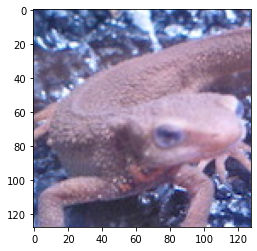

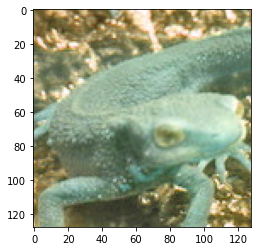

In [18]:
imshow = plt.imshow(img)
plt.show()

img5 = img.copy()
img_hsv = rgb2hsv(img5)

img_hsv[:,:,0]+=180

img5 = hsv2rgb(img_hsv)
imshow = plt.imshow(img5)

## 减色处理
将RGB的【0~255】范围离散化至【32 , 96 , 160 , 224】

In [19]:
def dcolor(img):
    img[img<64] = 32
    img[(img>=64)*(img<128)] = 96
    img[(img>=128)*(img<192)] = 160
    img[(img>=192)*(img<256)] = 224
    return img

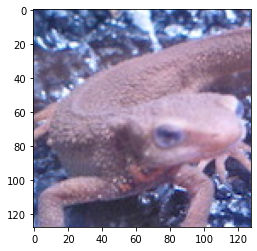

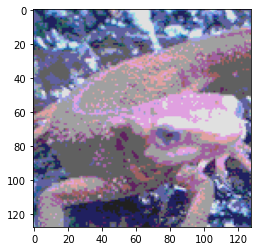

In [20]:
imshow = plt.imshow(img)
plt.show()

img6 = img.copy()
img6 = dcolor(img)
imshow = plt.imshow(img6)

## 平均池化(Average Pooling)
一定范围内的像素点全部转为该范围的平均值

In [21]:
def pooling(img,length,method):
    for i in range(int(img.shape[0]/length)):
        for j in range(int(img.shape[1]/length)):
            area = img[i*length:(i+1)*length,j*length:(j+1)*length]
            if(method=="avg"):
                area[:,:,0] = area[:,:,0].mean()
                area[:,:,1] = area[:,:,1].mean()
                area[:,:,2] = area[:,:,2].mean()
            if(method=="max"):
                area[:,:,0] = area[:,:,0].max()
                area[:,:,1] = area[:,:,1].max()
                area[:,:,2] = area[:,:,2].max()
    return img

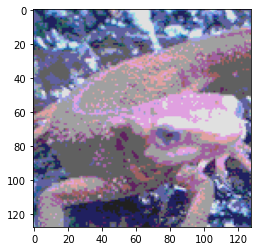

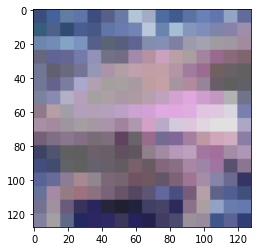

In [22]:
imshow = plt.imshow(img)
plt.show()

img7 = img.copy()
img7 = pooling(img7,8,"avg")
imshow = plt.imshow(img7)

## 最大池化(Max Pooling)
一定范围内的像素点全部转为该范围的最大值

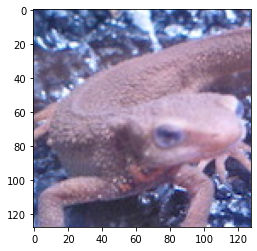

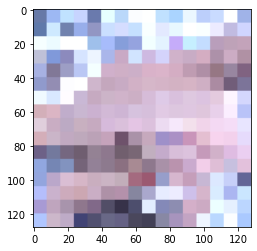

In [31]:
imshow = plt.imshow(img)
plt.show()

img8 = img.copy()
img8 = pooling(img8,8,"max")
imshow = plt.imshow(img8)

## 高斯滤波
1.先设定一个高斯核，高斯核的值由二维高斯函数计算得出

2.高斯核进行标准化，也就是和为1

3.对于每一个像素点，以它为中心取和高斯核相同大小的方块

4.将高斯核和方块相乘后累加，得出的值就是这个像素点的高斯滤波值

In [24]:
def padding(img,s=1):
    #先加行
    rows = np.zeros((s,img.shape[1],img.shape[2]),dtype="uint8")
    #再加列，这时候列长已经扩充 2*s
    columns = np.zeros((img.shape[0]+(2*s),s,img.shape[2]),dtype="uint8")
    #拼接
    img = np.vstack((rows,img,rows))
    img = np.hstack((columns,img,columns))
    return img

In [25]:
def getarea(img,padding,method):
    #建立一个新的数组，该数组用于保存计算的高斯滤波值，所以要去掉padding
    result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding,
                      img.shape[2]],dtype="uint8")
    
    for i in range(int(img.shape[0]-2)):
        for j in range(int(img.shape[1]-2)):
            area = img[i:i+3,j:j+3]
            if(method=="gaussian"):
                #将像素值赋值到中心点
                kernel = np.array([1,2,1,2,4,2,1,2,1])*(1/16)
                result[i,j,:] = gaussFilter(area,kernel)
            if(method=="median"):
                result[i,j,:] = medianFilter(area)

    return result

In [26]:
def gaussFilter(area,kernel):
    #拉成一条，用矩阵的乘法完成滤波计算，参考卷积核计算方法
    area = area.reshape(-1,3)
    newk = np.dot(kernel,area)
    newk = newk.astype(np.uint8)
    return newk

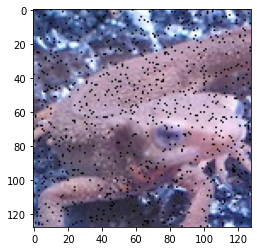

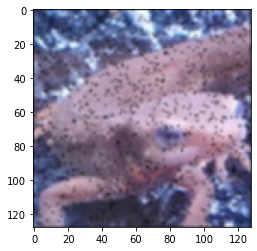

In [27]:
imshow = plt.imshow(img_noise)
plt.show()

img9 = img_noise.copy()
img9 = padding(img9,1)
img9 = getarea(img9,1,"gaussian")
imshow = plt.imshow(img9)

## 中值滤波
在滤波器中，取范围内的中值数填入中心点

In [28]:
def medianFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #进行排序后取出中间值
    newk = np.sort(area,axis=1)[:,4]
    return newk

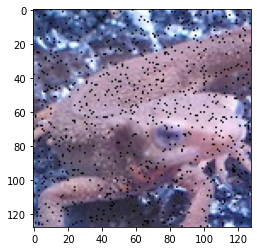

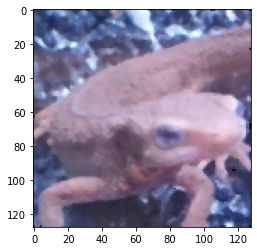

In [29]:
imshow = plt.imshow(img_noise)
plt.show()

img10 = img_noise.copy()
img10 = padding(img10,1)
img10 = getarea(img10,1,"median")
imshow = plt.imshow(img10)